In [1]:

import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

c:\Users\Archana\OneDrive\Attachments\Desktop\MDTM46B\phonepe_env\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\Archana\OneDrive\Attachments\Desktop\MDTM46B\phonepe_env\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\Archana\OneDrive\Attachments\Desktop\MDTM46B\phonepe_env\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 

In [2]:
train_dir = 'C:/Users/Archana/OneDrive/Attachments/Desktop/MDTM46B/Project 5-Multiclass Fish Image Classification/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/train'
val_dir = 'C:/Users/Archana/OneDrive/Attachments/Desktop/MDTM46B/Project 5-Multiclass Fish Image Classification/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/val'
test_dir = 'C:/Users/Archana/OneDrive/Attachments/Desktop/MDTM46B/Project 5-Multiclass Fish Image Classification/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/test'

In [3]:

img_height =  224
img_width =  224
batch_size = 32

In [4]:

datagen_train = ImageDataGenerator(
    rescale=1./255
    ,
    rotation_range=30,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)
     

In [5]:

datagen_val_test = ImageDataGenerator(rescale=1./255)


In [6]:
train_data = datagen_train.flow_from_directory(
    train_dir,
    target_size=(img_height,img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 6225 images belonging to 11 classes.


In [7]:
import json
labels = list(train_data.class_indices.keys())
with open('C:/Users/Archana/OneDrive/Attachments/Desktop/MDTM46B/Project 5-Multiclass Fish Image Classification/class_labels.json', 'w') as f:
    json.dump(labels, f)
print("✅ Saved class_labels.json")

✅ Saved class_labels.json


In [8]:

val_data = datagen_val_test.flow_from_directory(
    val_dir,
    target_size=(img_height,img_width),
    batch_size=batch_size,
    class_mode='categorical'
)
     

Found 1092 images belonging to 11 classes.


In [9]:

test_data = datagen_val_test.flow_from_directory(
    test_dir,
    target_size=(img_height,img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 3187 images belonging to 11 classes.


In [10]:
print("✅ Classes:", train_data.class_indices)

✅ Classes: {'animal fish': 0, 'animal fish bass': 1, 'fish sea_food black_sea_sprat': 2, 'fish sea_food gilt_head_bream': 3, 'fish sea_food hourse_mackerel': 4, 'fish sea_food red_mullet': 5, 'fish sea_food red_sea_bream': 6, 'fish sea_food sea_bass': 7, 'fish sea_food shrimp': 8, 'fish sea_food striped_red_mullet': 9, 'fish sea_food trout': 10}


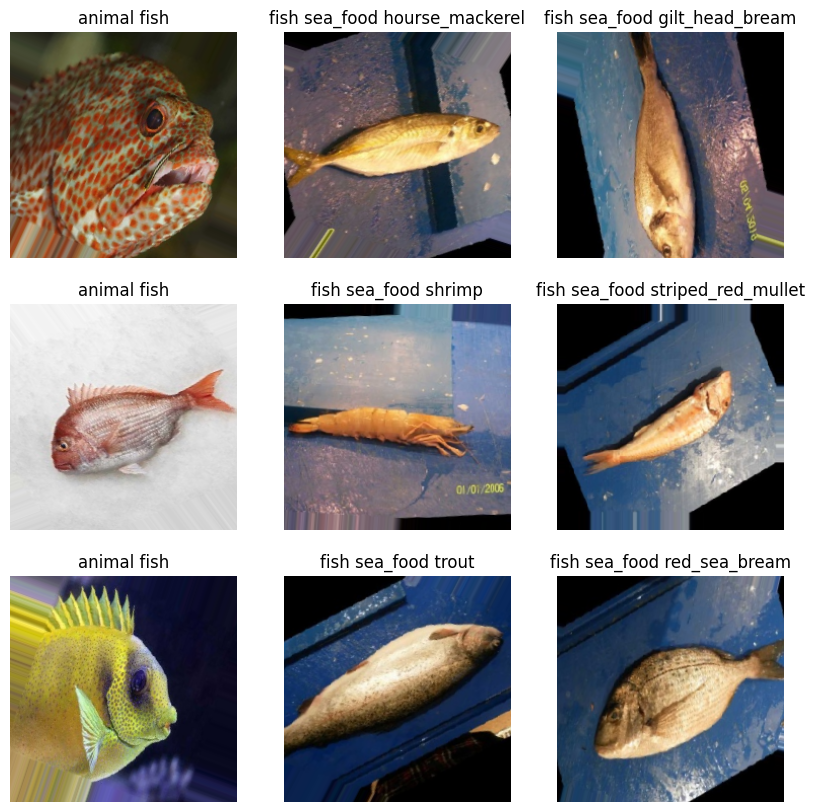

In [11]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
images,labels=next(train_data)
plt.figure(figsize=(10,10))

for i in range (9):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i])
        class_names=list(train_data.class_indices.keys())
        img_label=class_names[np.argmax(labels[i])]
        
        
        plt.title(img_label)
        plt.axis('off')
plt.show()

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam

cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_height,img_width,3)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
   
    Dense(train_data.num_classes, activation='softmax')
])

cnn_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()

c:\Users\Archana\OneDrive\Attachments\Desktop\MDTM46B\phonepe_env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │         2,827 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,248,395 (84.87 MB)

 Trainable params: 22,247,947 (84.87 MB)

 Non-trainable params: 448 (1.75 KB)

In [13]:
history_cnn = cnn_model.fit(train_data,epochs=20,validation_data=val_data)
     

Epoch 1/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 372s 2s/step - accuracy: 0.5361 - loss: 1.6168 - val_accuracy: 0.1007 - val_loss: 11.4808
Epoch 2/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 357s 2s/step - accuracy: 0.7149 - loss: 0.8891 - val_accuracy: 0.3040 - val_loss: 6.5799
Epoch 3/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 347s 2s/step - accuracy: 0.7767 - loss: 0.7074 - val_accuracy: 0.7894 - val_loss: 0.6540
Epoch 4/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 356s 2s/step - accuracy: 0.8190 - loss: 0.5622 - val_accuracy: 0.9222 - val_loss: 0.2856
Epoch 5/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 354s 2s/step - accuracy: 0.8612 - loss: 0.4454 - val_accuracy: 0.9579 - val_loss: 0.1987
Epoch 6/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 360s 2s/step - accuracy: 0.8734 - loss: 0.3975 - val_accuracy: 0.9377 - val_loss: 0.2912
Epoch 7/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 367s 2s/step - accuracy: 0.8906 - loss: 0.3540 - val_accuracy: 0.9734 - val_loss: 0.1361
Epoch 8/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 339s 2s/step - accuracy: 0.9044 - loss: 0.2855 - val_acc

In [14]:
cnn_model.save('/content/cnn_fish_model.h5')
cnn_model.save('/content/cnn_fish_model.keras')
print("✅ Saved cnn_fish_model.h5")

✅ Saved cnn_fish_model.h5


MODEL 1: VGG16

In [15]:
#Essential Imports
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D,Dense,Dropout
from tensorflow.keras.optimizers import Adam


In [16]:
#Load pre-trained VGG16
VGG_base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [17]:
#Modifying the output layer
x = VGG_base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(train_data.num_classes, activation='softmax')(x)

model_vgg = Model(inputs=VGG_base_model.input, outputs=output)

In [18]:
#Set whole model trainable
VGG_base_model.trainable = True

#Freeze all layers except 4
for layer in VGG_base_model.layers[:-4]:
    layer.trainable = False
#compile the model

model_vgg.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


history_vgg = model_vgg.fit(
    train_data,
    validation_data=val_data,
    epochs=5,
)

model_vgg.save('VGG16/vgg16_finetuned_model.h5')

model_vgg.save('VGG16/vgg16_finetuned_model.keras')


Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 1425s 7s/step - accuracy: 0.3070 - loss: 2.0151 - val_accuracy: 0.6410 - val_loss: 1.3390
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 1442s 7s/step - accuracy: 0.6233 - loss: 1.1644 - val_accuracy: 0.8663 - val_loss: 0.6534
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 1443s 7s/step - accuracy: 0.7778 - loss: 0.7174 - val_accuracy: 0.9286 - val_loss: 0.3596
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 1589s 8s/step - accuracy: 0.8419 - loss: 0.5210 - val_accuracy: 0.9588 - val_loss: 0.2626
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 1652s 8s/step - accuracy: 0.8867 - loss: 0.3828 - val_accuracy: 0.9634 - val_loss: 0.1792


MODEL 2 : ResNet50

In [19]:
pip install h5py

Note: you may need to restart the kernel to use updated packages.


In [20]:
from tensorflow.keras.applications import ResNet50
#Load pre-trained ResNet50
resnet_base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

#Modifying the output layer
x = resnet_base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(train_data.num_classes, activation='softmax')(x)

model_resnet = Model(inputs=resnet_base_model.input, outputs=output)

In [21]:
#Set whole model trainable
resnet_base_model.trainable = True

#Freeze all layers except 4
for layer in resnet_base_model.layers[:-20]:
    layer.trainable = False
#compile the model

model_resnet.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


history_resnet= model_resnet.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
)

model_resnet.save('ResNet50/resnet_finetuned_model.h5')

model_resnet.save('ResNet50/resnet_finetuned_model.keras')


Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 632s 3s/step - accuracy: 0.2553 - loss: 2.1439 - val_accuracy: 0.1712 - val_loss: 2.4423
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 564s 3s/step - accuracy: 0.4095 - loss: 1.7331 - val_accuracy: 0.3819 - val_loss: 1.9810
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 1248s 6s/step - accuracy: 0.5022 - loss: 1.4851 - val_accuracy: 0.6227 - val_loss: 1.2587
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 558s 3s/step - accuracy: 0.5608 - loss: 1.3250 - val_accuracy: 0.6383 - val_loss: 1.0805
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 562s 3s/step - accuracy: 0.6092 - loss: 1.1960 - val_accuracy: 0.6832 - val_loss: 0.9873
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 565s 3s/step - accuracy: 0.6316 - loss: 1.1227 - val_accuracy: 0.7418 - val_loss: 0.8451
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 575s 3s/step - accuracy: 0.6602 - loss: 1.0335 - val_accuracy: 0.7509 - val_loss: 0.7497
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 550s 3s/step - accuracy: 0.6837 - loss: 0.9599 - val_acc

MODEL 3 -MobileNet

In [22]:
from tensorflow.keras.applications import MobileNet
#Load pre-trained MobileNet
mobilenet_base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

#Modifying the output layer
x = mobilenet_base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(train_data.num_classes, activation='softmax')(x)

model_mobilenet = Model(inputs=mobilenet_base_model.input, outputs=output)

In [23]:
#Set whole model trainable
mobilenet_base_model.trainable = True

#Freeze all layers except 4
for layer in mobilenet_base_model.layers[:-30]:
    layer.trainable = False
#compile the model

model_mobilenet.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


history_mobilenet= model_mobilenet.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
)

model_mobilenet.save('MobileNet/mobilenet_finetuned_model.h5')

model_mobilenet.save('MobileNet/mobilenet_finetuned_model.keras')


Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 276s 1s/step - accuracy: 0.2607 - loss: 2.3291 - val_accuracy: 0.6932 - val_loss: 1.2435
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 306s 1s/step - accuracy: 0.5719 - loss: 1.3141 - val_accuracy: 0.9194 - val_loss: 0.6539
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 232s 1s/step - accuracy: 0.7451 - loss: 0.8535 - val_accuracy: 0.9615 - val_loss: 0.3761
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 274s 1s/step - accuracy: 0.8384 - loss: 0.5930 - val_accuracy: 0.9799 - val_loss: 0.2360
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 234s 1s/step - accuracy: 0.8888 - loss: 0.4355 - val_accuracy: 0.9844 - val_loss: 0.1608
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 234s 1s/step - accuracy: 0.9147 - loss: 0.3310 - val_accuracy: 0.9872 - val_loss: 0.1177
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 234s 1s/step - accuracy: 0.9308 - loss: 0.2704 - val_accuracy: 0.9890 - val_loss: 0.0898
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 238s 1s/step - accuracy: 0.9459 - loss: 0.2183 - val_accu

MODEL 4 : InceptionV3

In [24]:
from tensorflow.keras.applications import InceptionV3
#Load pre-trained InceptionV3
inception_base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

#Modifying the output layer
x = inception_base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(train_data.num_classes, activation='softmax')(x)

model_inception = Model(inputs=inception_base_model.input, outputs=output)

In [25]:
#Set whole model trainable
inception_base_model.trainable = True

#Freeze all layers except 4
for layer in inception_base_model.layers[:-50]:
    layer.trainable = False
#compile the model

model_inception.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


history_inception= model_inception.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
)

model_inception.save('InceptionV3/inception_finetuned_model.h5')

model_inception.save('InceptionV3/inception_finetuned_model.keras')


Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 379s 2s/step - accuracy: 0.4490 - loss: 1.7470 - val_accuracy: 0.8480 - val_loss: 0.9430
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 351s 2s/step - accuracy: 0.8034 - loss: 0.8401 - val_accuracy: 0.9304 - val_loss: 0.3994
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 356s 2s/step - accuracy: 0.8872 - loss: 0.4839 - val_accuracy: 0.9533 - val_loss: 0.2359
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 351s 2s/step - accuracy: 0.9153 - loss: 0.3441 - val_accuracy: 0.9634 - val_loss: 0.1629
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 359s 2s/step - accuracy: 0.9378 - loss: 0.2552 - val_accuracy: 0.9707 - val_loss: 0.1238
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 351s 2s/step - accuracy: 0.9497 - loss: 0.2092 - val_accuracy: 0.9808 - val_loss: 0.0987
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 351s 2s/step - accuracy: 0.9589 - loss: 0.1735 - val_accuracy: 0.9826 - val_loss: 0.0825
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 345s 2s/step - accuracy: 0.9631 - loss: 0.1462 - val_accu

Model 5: EfficientNetB0

In [26]:
from tensorflow.keras.applications import EfficientNetB0
#Load pre-trained EfficientNetB0
efficientnet_base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

#Modifying the output layer
x = efficientnet_base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(train_data.num_classes, activation='softmax')(x)

model_efficientnet = Model(inputs=efficientnet_base_model.input, outputs=output)

In [27]:
#Set whole model trainable
efficientnet_base_model.trainable = True

#Freeze all layers except 4
for layer in efficientnet_base_model.layers[:-20]:
    layer.trainable = False
#compile the model

model_efficientnet.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


history_efficientnet= model_efficientnet.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
)

model_efficientnet.save('EfficientNetB0/efficientnet_finetuned_model.h5')

model_efficientnet.save('EfficientNetB0/efficientnet_finetuned_model.keras')


Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 244s 1s/step - accuracy: 0.1231 - loss: 2.3901 - val_accuracy: 0.1575 - val_loss: 2.3918
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 223s 1s/step - accuracy: 0.1549 - loss: 2.3549 - val_accuracy: 0.1712 - val_loss: 2.3440
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 223s 1s/step - accuracy: 0.1645 - loss: 2.3432 - val_accuracy: 0.1712 - val_loss: 2.3289
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 217s 1s/step - accuracy: 0.1658 - loss: 2.3387 - val_accuracy: 0.1712 - val_loss: 2.3232
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 216s 1s/step - accuracy: 0.1693 - loss: 2.3341 - val_accuracy: 0.1712 - val_loss: 2.3212
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 315s 1s/step - accuracy: 0.1635 - loss: 2.3313 - val_accuracy: 0.1712 - val_loss: 2.3185
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 256s 1s/step - accuracy: 0.1680 - loss: 2.3291 - val_accuracy: 0.1712 - val_loss: 2.3163
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 263s 1s/step - accuracy: 0.1671 - loss: 2.3262 - val_accu

Accuracy

In [28]:
#Computing CNN Accuracy
cnn_loss, cnn_accuracy = cnn_model.evaluate(test_data)
print(f"Custom CNN Accuracy: {cnn_accuracy:.4f}")

#Computing fine tuned VGG16s Accuracy
vgg_loss, vgg_accuracy = model_vgg.evaluate(test_data)
print(f"VGG16 Accuracy: {vgg_accuracy:.4f}")

#Computing fine tuned ResNet50s Accuracy
resnet_loss, resnet_accuracy = model_resnet.evaluate(test_data)
print(f"ResNet50 Accuracy: {resnet_accuracy:.4f}")

#Computing fine tuned MobileNets Accuracy
mobilenet_loss, mobilenet_accuracy = model_mobilenet.evaluate(test_data)
print(f"MobileNet Accuracy: {mobilenet_accuracy:.4f}")

#Computing fine tuned Inceptionv3 Accuracy
inception_loss, inception_accuracy = model_inception.evaluate(test_data)
print(f"InceptionV3 Accuracy: {inception_accuracy:.4f}")

#Computing fine tuned EfficientNetb0 Accuracy
efficient_loss, efficient_accuracy = model_efficientnet.evaluate(test_data)
print(f"EfficientNetB0 Accuracy: {efficient_accuracy:.4f}")

100/100 ━━━━━━━━━━━━━━━━━━━━ 40s 386ms/step - accuracy: 0.9849 - loss: 0.0923
Custom CNN Accuracy: 0.9849
100/100 ━━━━━━━━━━━━━━━━━━━━ 646s 6s/step - accuracy: 0.9664 - loss: 0.1546
VGG16 Accuracy: 0.9664
100/100 ━━━━━━━━━━━━━━━━━━━━ 235s 2s/step - accuracy: 0.8001 - loss: 0.6391
ResNet50 Accuracy: 0.8001
100/100 ━━━━━━━━━━━━━━━━━━━━ 54s 538ms/step - accuracy: 0.9944 - loss: 0.0358
MobileNet Accuracy: 0.9944
100/100 ━━━━━━━━━━━━━━━━━━━━ 146s 1s/step - accuracy: 0.9940 - loss: 0.0283
InceptionV3 Accuracy: 0.9940
100/100 ━━━━━━━━━━━━━━━━━━━━ 76s 751ms/step - accuracy: 0.1632 - loss: 2.3139
EfficientNetB0 Accuracy: 0.1632


Precision,Recall,F1-Score

In [29]:
from sklearn.metrics import classification_report
import numpy as np

In [30]:
# Custom CNN
test_data.reset()
cnn_prob = cnn_model.predict(test_data, verbose=0)
cnn_pred = np.argmax(cnn_prob, axis=1)
print("=== Custom CNN ===")
print(classification_report(test_data.classes, cnn_pred, target_names=test_data.class_indices.keys(), zero_division=0, digits=4))

=== Custom CNN ===
                                  precision    recall  f1-score   support

                     animal fish     0.9773    0.9942    0.9857       520
                animal fish bass     0.6667    0.1538    0.2500        13
   fish sea_food black_sea_sprat     0.9966    0.9866    0.9916       298
   fish sea_food gilt_head_bream     1.0000    0.9738    0.9867       305
   fish sea_food hourse_mackerel     0.9896    0.9965    0.9930       286
        fish sea_food red_mullet     0.9966    1.0000    0.9983       291
     fish sea_food red_sea_bream     0.9962    0.9670    0.9814       273
          fish sea_food sea_bass     0.9451    1.0000    0.9718       327
            fish sea_food shrimp     0.9797    1.0000    0.9897       289
fish sea_food striped_red_mullet     1.0000    0.9590    0.9791       293
             fish sea_food trout     0.9865    1.0000    0.9932       292

                        accuracy                         0.9849      3187
                 

In [31]:
# VGG16
test_data.reset()
vgg_prob = model_vgg.predict(test_data, verbose=0)
vgg_pred = np.argmax(vgg_prob, axis=1)
print("=== VGG16 ===")
print(classification_report(test_data.classes, vgg_pred, target_names=test_data.class_indices.keys(), zero_division=0, digits=4))

=== VGG16 ===
                                  precision    recall  f1-score   support

                     animal fish     0.9792    0.9962    0.9876       520
                animal fish bass     1.0000    0.0769    0.1429        13
   fish sea_food black_sea_sprat     0.9551    1.0000    0.9770       298
   fish sea_food gilt_head_bream     0.9356    1.0000    0.9667       305
   fish sea_food hourse_mackerel     1.0000    0.9371    0.9675       286
        fish sea_food red_mullet     0.9632    0.9003    0.9307       291
     fish sea_food red_sea_bream     1.0000    0.9304    0.9639       273
          fish sea_food sea_bass     0.9938    0.9786    0.9861       327
            fish sea_food shrimp     0.9666    1.0000    0.9830       289
fish sea_food striped_red_mullet     0.8770    0.9488    0.9115       293
             fish sea_food trout     1.0000    0.9829    0.9914       292

                        accuracy                         0.9664      3187
                      

In [32]:
# ResNet5
# 0
test_data.reset()
resnet_prob = model_resnet.predict(test_data, verbose=0)
resnet_pred = np.argmax(resnet_prob, axis=1)
print("=== ResNet50 ===")
print(classification_report(test_data.classes, resnet_pred, target_names=test_data.class_indices.keys(), zero_division=0, digits=4))

=== ResNet50 ===
                                  precision    recall  f1-score   support

                     animal fish     0.9345    0.9596    0.9469       520
                animal fish bass     0.0000    0.0000    0.0000        13
   fish sea_food black_sea_sprat     0.7101    0.8960    0.7923       298
   fish sea_food gilt_head_bream     0.7330    0.8820    0.8006       305
   fish sea_food hourse_mackerel     0.6621    0.8427    0.7415       286
        fish sea_food red_mullet     0.7969    0.7148    0.7536       291
     fish sea_food red_sea_bream     0.8060    0.8828    0.8427       273
          fish sea_food sea_bass     0.7399    0.7309    0.7354       327
            fish sea_food shrimp     0.8187    0.9377    0.8742       289
fish sea_food striped_red_mullet     0.8700    0.2969    0.4427       293
             fish sea_food trout     0.9828    0.7808    0.8702       292

                        accuracy                         0.8001      3187
                   

In [33]:
# MobileNet
test_data.reset()
mobilenet_prob = model_mobilenet.predict(test_data, verbose=0)
mobilenet_pred = np.argmax(mobilenet_prob, axis=1)
print("=== MobileNet ===")
print(classification_report(test_data.classes, mobilenet_pred, target_names=test_data.class_indices.keys(), zero_division=0, digits=4))

=== MobileNet ===
                                  precision    recall  f1-score   support

                     animal fish     0.9756    1.0000    0.9877       520
                animal fish bass     0.0000    0.0000    0.0000        13
   fish sea_food black_sea_sprat     1.0000    1.0000    1.0000       298
   fish sea_food gilt_head_bream     1.0000    1.0000    1.0000       305
   fish sea_food hourse_mackerel     1.0000    1.0000    1.0000       286
        fish sea_food red_mullet     0.9931    0.9897    0.9914       291
     fish sea_food red_sea_bream     1.0000    1.0000    1.0000       273
          fish sea_food sea_bass     1.0000    1.0000    1.0000       327
            fish sea_food shrimp     1.0000    1.0000    1.0000       289
fish sea_food striped_red_mullet     0.9898    0.9932    0.9915       293
             fish sea_food trout     1.0000    1.0000    1.0000       292

                        accuracy                         0.9944      3187
                  

In [34]:
# InceptionV3
test_data.reset()
inception_prob = model_inception.predict(test_data, verbose=0)
inception_pred = np.argmax(inception_prob, axis=1)
print("=== InceptionV3 ===")
print(classification_report(test_data.classes, inception_pred, target_names=test_data.class_indices.keys(), zero_division=0, digits=4))

=== InceptionV3 ===
                                  precision    recall  f1-score   support

                     animal fish     0.9774    0.9981    0.9876       520
                animal fish bass     1.0000    0.0769    0.1429        13
   fish sea_food black_sea_sprat     1.0000    1.0000    1.0000       298
   fish sea_food gilt_head_bream     1.0000    1.0000    1.0000       305
   fish sea_food hourse_mackerel     1.0000    1.0000    1.0000       286
        fish sea_food red_mullet     0.9965    0.9897    0.9931       291
     fish sea_food red_sea_bream     1.0000    1.0000    1.0000       273
          fish sea_food sea_bass     0.9939    1.0000    0.9970       327
            fish sea_food shrimp     1.0000    1.0000    1.0000       289
fish sea_food striped_red_mullet     0.9864    0.9898    0.9881       293
             fish sea_food trout     1.0000    1.0000    1.0000       292

                        accuracy                         0.9940      3187
                

In [35]:
# EfficientNetB0
test_data.reset()
efficient_prob = model_efficientnet.predict(test_data, verbose=0)
efficient_pred = np.argmax(efficient_prob, axis=1)
print("=== EfficientNetB0 ===")
print(classification_report(test_data.classes, efficient_pred, target_names=test_data.class_indices.keys(), zero_division=0, digits=4))

=== EfficientNetB0 ===
                                  precision    recall  f1-score   support

                     animal fish     0.1632    1.0000    0.2806       520
                animal fish bass     0.0000    0.0000    0.0000        13
   fish sea_food black_sea_sprat     0.0000    0.0000    0.0000       298
   fish sea_food gilt_head_bream     0.0000    0.0000    0.0000       305
   fish sea_food hourse_mackerel     0.0000    0.0000    0.0000       286
        fish sea_food red_mullet     0.0000    0.0000    0.0000       291
     fish sea_food red_sea_bream     0.0000    0.0000    0.0000       273
          fish sea_food sea_bass     0.0000    0.0000    0.0000       327
            fish sea_food shrimp     0.0000    0.0000    0.0000       289
fish sea_food striped_red_mullet     0.0000    0.0000    0.0000       293
             fish sea_food trout     0.0000    0.0000    0.0000       292

                        accuracy                         0.1632      3187
             

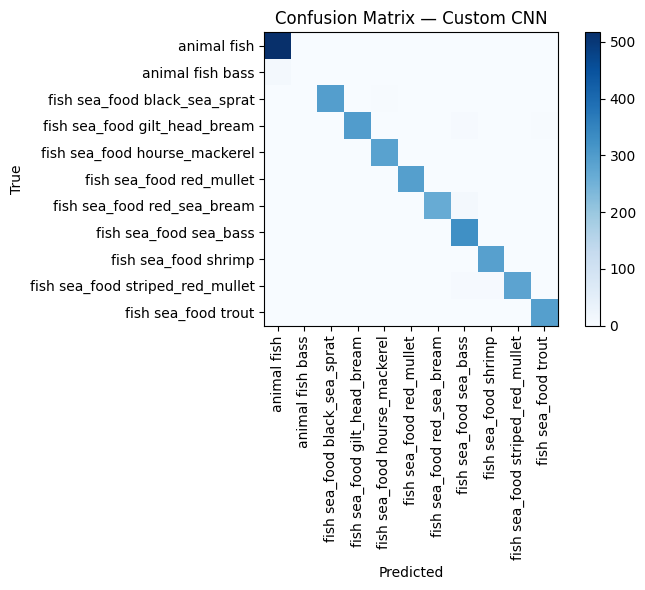

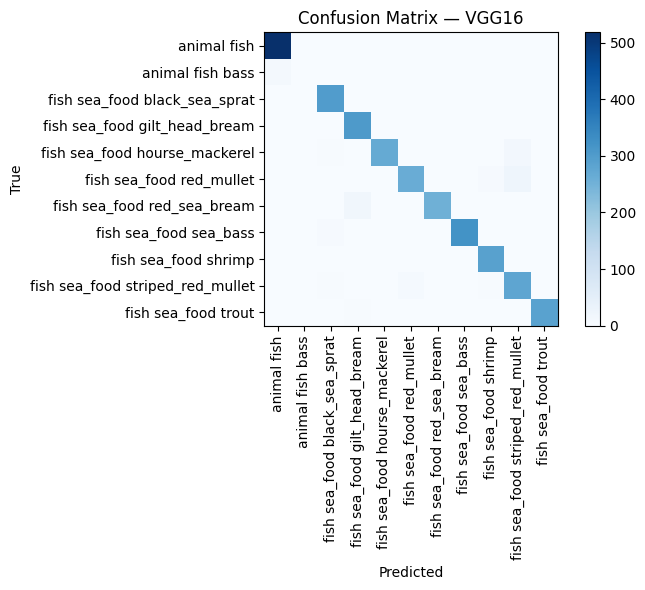

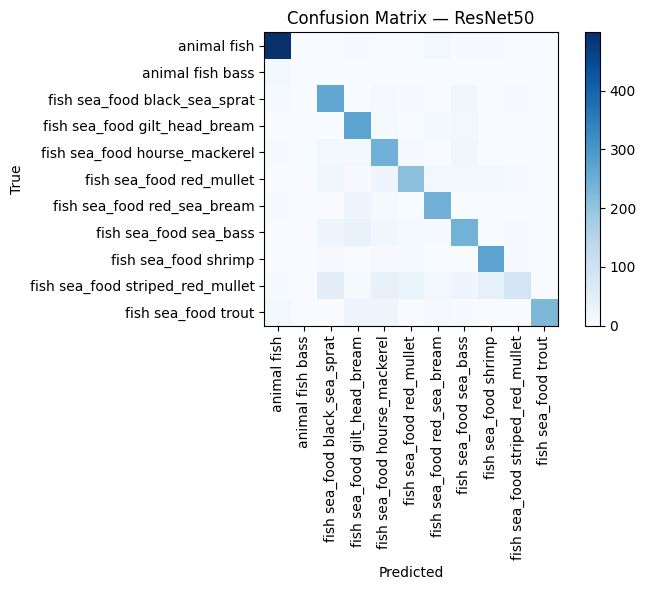

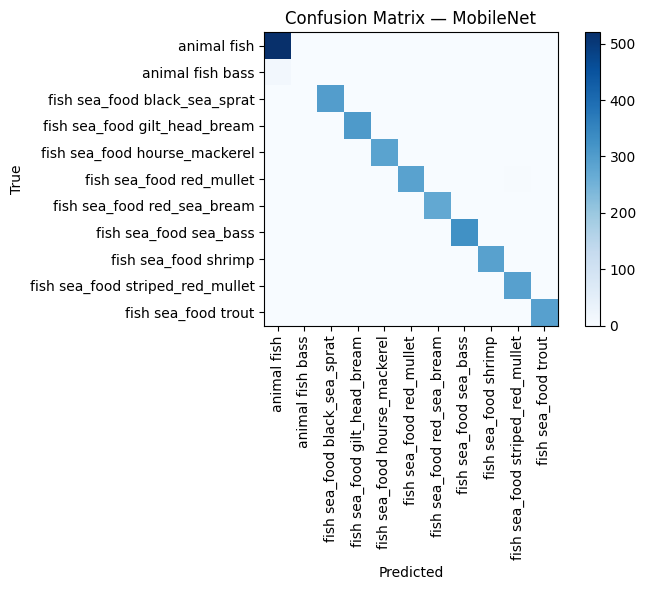

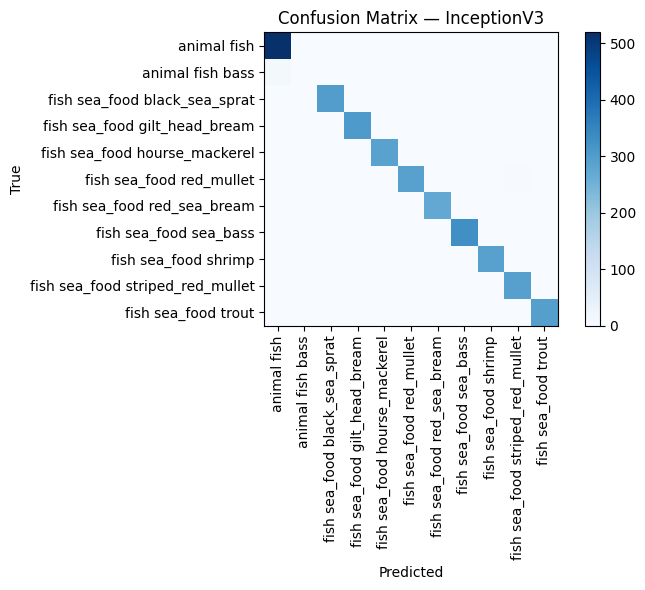

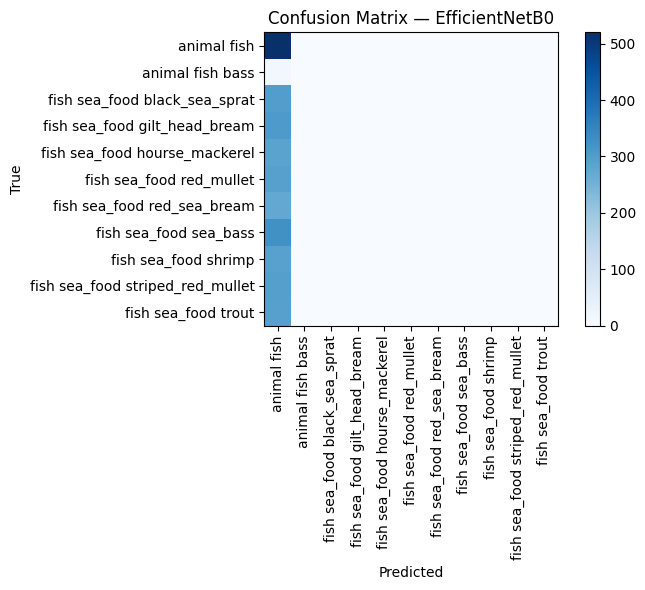

In [36]:
# Essential Imports
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Function to plot the confusion matrix

def plot_confusion_matrix(y_true, y_pred, class_names, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=90)
    plt.yticks(tick_marks, class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    plt.show()

class_names = list(test_data.class_indices.keys())
y_true = test_data.classes

# Custom CNN
plot_confusion_matrix(y_true, cnn_pred, class_names, "Confusion Matrix — Custom CNN")

# VGG16
plot_confusion_matrix(y_true, vgg_pred, class_names, "Confusion Matrix — VGG16")

# ResNet50
plot_confusion_matrix(y_true, resnet_pred, class_names, "Confusion Matrix — ResNet50")

# MobileNet
plot_confusion_matrix(y_true, mobilenet_pred, class_names, "Confusion Matrix — MobileNet")

# InceptionV3
plot_confusion_matrix(y_true, inception_pred, class_names, "Confusion Matrix — InceptionV3")

# EfficientNetB0
plot_confusion_matrix(y_true, efficient_pred, class_names, "Confusion Matrix — EfficientNetB0")

In [37]:
# Essential Imports
import matplotlib.pyplot as plt

histories = [
    ("Custom CNN",history_cnn),
    ("VGG16 (fine-tuned)", history_vgg),
    ("ResNet50 (fine-tuned)", history_resnet),
    ("MobileNet (fine-tuned)", history_mobilenet),
    ("InceptionV3 (fine-tuned)", history_inception),
    ("EfficientNetB0 (fine-tuned)", history_efficientnet),
]

def _get(hist, k1, k2):
    return hist.history.get(k1) or hist.history.get(k2)

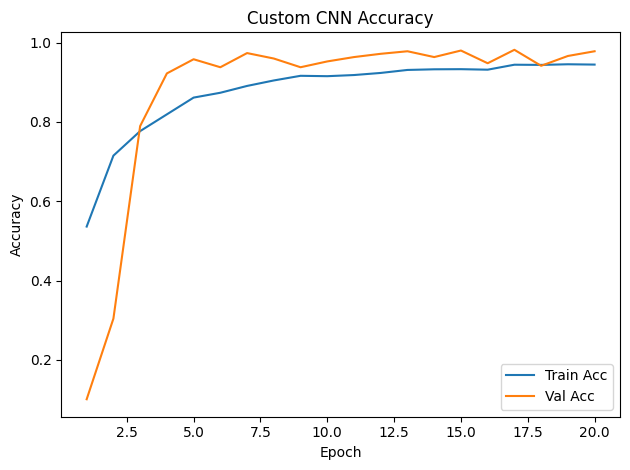

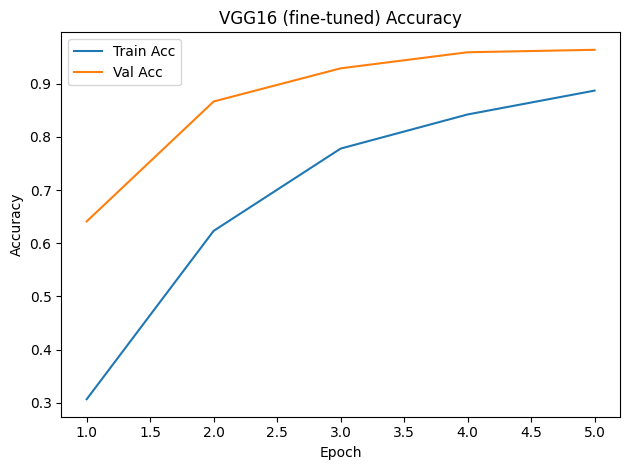

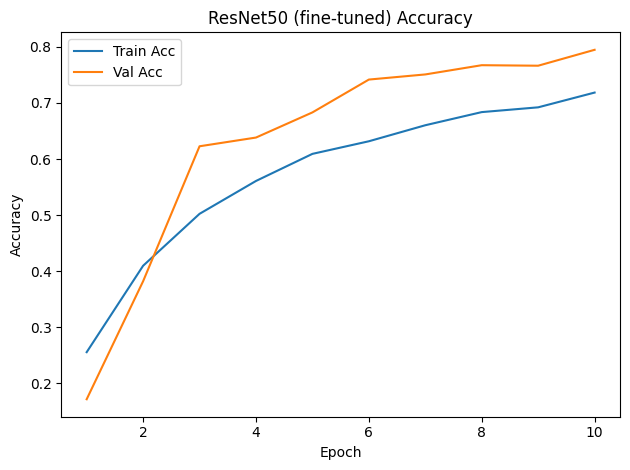

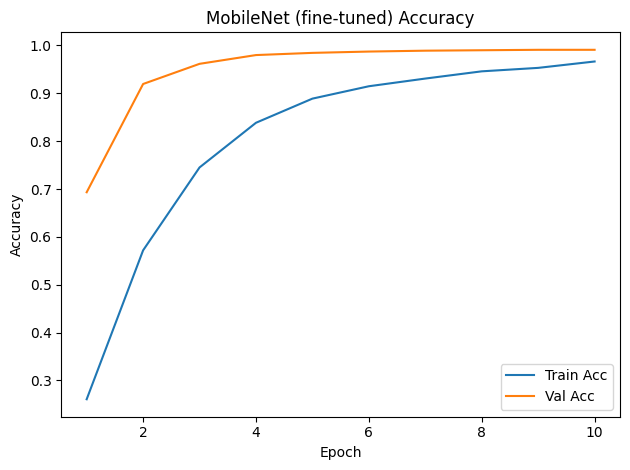

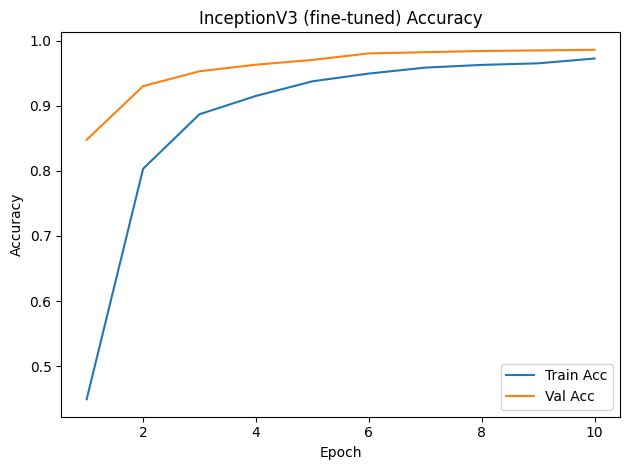

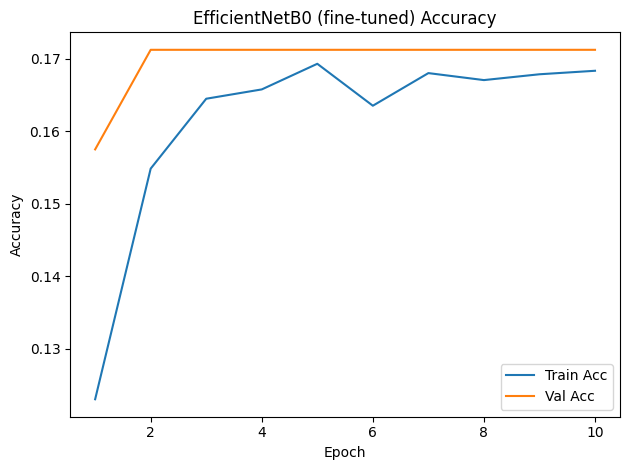

In [38]:
# Iterate through each model
for title, h in histories:
    acc = _get(h, "accuracy", "acc")
    val_acc = _get(h, "val_accuracy", "val_acc")
    loss = h.history.get("loss")
    val_loss = h.history.get("val_loss")
    epochs = range(1, len(loss)+1) if loss else range(1, len(acc)+1)

    # Plot Accuracy
    plt.figure()
    if acc:
        plt.plot(epochs, acc, label="Train Acc")
    if val_acc:
        plt.plot(epochs, val_acc, label="Val Acc")
    plt.title(f"{title} Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.tight_layout()
    plt.show()

In [39]:
# Store the accuracies in a dictionary
model_accuracies = {
    "Custom CNN":cnn_accuracy,
    "VGG16": vgg_accuracy,
    "ResNet50": resnet_accuracy,
    "MobileNet": mobilenet_accuracy,
    "InceptionV3 Accuracy":inception_accuracy,
    "EfficientNetB0 Accuracy":efficient_accuracy
    # Add other models like InceptionV3 and EfficientNetB0 once their evaluation is complete
}

In [40]:
# Find the model with the highest accuracy
best_model_name = max(model_accuracies, key=model_accuracies.get)
best_accuracy = model_accuracies[best_model_name]

# Print the best model and its accuracy
print(f"Best Model: {best_model_name}")
print(f"Best Accuracy: {best_accuracy:.4f}")

Best Model: MobileNet
Best Accuracy: 0.9944
